In [1]:
from astropy.io import fits
import reproject

In [2]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [3]:
files_466 = [
fits.open(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_nrca_destarred6.fits'),
fits.open(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_nrcb_destarred6.fits'),
]
files_405 = [
fits.open(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_nrca_destarred6.fits'),
fits.open(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_nrcb_destarred6.fits'),
]
files_187 = [
fits.open(f'{basepath}/images/F187_minus_F182cont_refitted187wcsto182_nrca_destarred6.fits'),
fits.open(f'{basepath}/images/F187_minus_F182cont_refitted187wcsto182_nrcb_destarred6.fits'),
]

In [4]:
weights_466 = [
    fits.open(f'{basepath}F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_i2d.fits')[('WHT', 1)],
    fits.open(f'{basepath}F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrcb_i2d.fits')[('WHT', 1)],
]
weights_405 = [
    fits.open(f'{basepath}F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrca_i2d.fits')[('WHT', 1)],
    fits.open(f'{basepath}F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrcb_i2d.fits')[('WHT', 1)],
]
weights_187 = [
    fits.open(f'{basepath}F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-nrca_i2d.fits')[('WHT', 1)],
    fits.open(f'{basepath}F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-nrcb_i2d.fits')[('WHT', 1)],
]

In [5]:
from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd

In [6]:

target_wcs, target_shape = find_optimal_celestial_wcs(files_466)
merged_466, weights = reproject_and_coadd(files_466, output_projection=target_wcs,
                                          input_weights=weights_466,
                                          shape_out=target_shape, reproject_function=reproject.reproject_interp)
(fits.PrimaryHDU(data=merged_466,
                 header=target_wcs.to_header())
 .writeto(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_merged_destarred6.fits', overwrite=True)
)

Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [7]:

target_wcs, target_shape = find_optimal_celestial_wcs(files_405)
merged_405, weights = reproject_and_coadd(files_405, output_projection=target_wcs,
                                          input_weights=weights_405,
                                          shape_out=target_shape, reproject_function=reproject.reproject_interp)
(fits.PrimaryHDU(data=merged_405,
                 header=target_wcs.to_header())
 .writeto(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_merged_destarred6.fits', overwrite=True)
)

Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [8]:

target_wcs, target_shape = find_optimal_celestial_wcs(files_187)
merged_187, weights = reproject_and_coadd(files_187, output_projection=target_wcs,
                                          input_weights=weights_187,
                                          shape_out=target_shape, reproject_function=reproject.reproject_interp)
(fits.PrimaryHDU(data=merged_187,
                 header=target_wcs.to_header())
 .writeto(f'{basepath}/images/F187_minus_F182cont_refitted187wcsto182_merged_destarred6.fits', overwrite=True)
)

Set DATE-AVG to '2022-08-28T03:05:31.928' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.621' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-08-28T03:05:33.047' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.365' from MJD-END'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-08-28T03:05:31.928' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.621' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-08-28T03:05:33.047' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.365' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [9]:
import pyavm
import numpy as np
import PIL
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
import pylab as pl
from astropy.visualization import simple_norm

In [11]:
(fits.getdata(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_merged_destarred6.fits').shape,
       fits.getdata(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_merged_destarred6.fits').shape,
       fits.getdata(f'{basepath}/images/F187_minus_F182cont_refitted187wcsto182_merged_destarred6.fits').shape,)

((5727, 2353), (5727, 2353), (11769, 4854))

In [12]:
F187mF182reproj, _ = reproject.reproject_exact(
    fits.open(f'{basepath}/images/F187_minus_F182cont_refitted187wcsto182_merged_destarred6.fits'),
    fits.getheader(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_merged_destarred6.fits'))
fits.PrimaryHDU(data=F187mF182reproj, 
                header=fits.getheader(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_merged_destarred6.fits')
               ).writeto(f'{basepath}/images/F187_minus_F182cont_refitted187wcsto182_merged_destarred6_reproj405.fits',
                         overwrite=True)

/blue/adamginsburg/adamginsburg/repos/reproject/reproject/spherical_intersect/core.py:47: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  warnings.warn("The reproject_exact function currently has precision "


In [13]:
rgb = np.array(
      [
       #fits.getdata(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_nrcb.fits'),
       #fits.getdata(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_nrcb.fits'),
       fits.getdata(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_merged_destarred6.fits'),
       fits.getdata(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_merged_destarred6.fits'),
       #fits.getdata(f'{basepath}/images/F410_minus_F405_nrcb.fits')
      ]
).swapaxes(0,2).swapaxes(0,1)
rgb2 = np.array( #TODO: need to reproject the 187-182 to 410
      [
       #fits.getdata(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_nrcb.fits'),
       #fits.getdata(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_nrcb.fits'),
       fits.getdata(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_merged_destarred6.fits'),
       fits.getdata(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_merged_destarred6.fits'),
       F187mF182reproj,
       # NEEDS TO BE REPROJECTED fits.getdata(f'{basepath}/images/F187_minus_F182cont_refitted187wcsto182_merged_destarred6.fits'),
       #fits.getdata(f'{basepath}/images/F410_minus_F405_nrcb.fits')
      ]
).swapaxes(0,2).swapaxes(0,1)
#for layer in (0,1,2):
#    # desaturate stars (though this will whiten the edges!)
#    rgb[:,:,layer][np.isnan(rgb[:,:,layer])] = np.nanmax(rgb[:,:,layer])
#    rgb[:,:,layer][rgb[:,:,layer] == 0] = np.nanmax(rgb[:,:,layer])

In [14]:
AVM = pyavm.AVM.from_header(fits.getheader(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_merged_destarred6.fits'))
# AVM = pyavm.AVM.from_header(fits.getheader(f'{basepath}/F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrcb_i2d.fits', ext=['SCI', 1]))

In [15]:
def save_rgb(img, filename, flip=-1):
    img = (img*256)
    img[img<0] = 0
    img[img>255] = 255
    img = img.astype('uint8')
    img = PIL.Image.fromarray(img[::flip,:,:])
    img.save(filename)

In [16]:
0.35 * 360

125.99999999999999

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


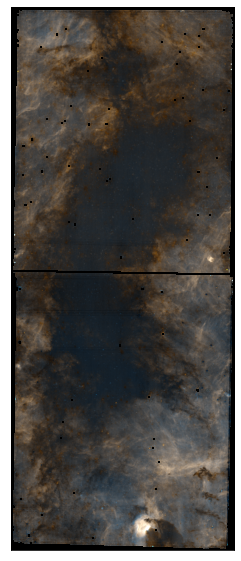

In [17]:
narrowsum = rgb[:,:,0] + rgb[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgb[:,:,0], stretch='asinh', min_cut=-1, max_cut=90)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_cut=-1, max_cut=120)(rgb[:,:,1]),
                       simple_norm(narrowsum,  stretch='asinh', min_cut=-2, max_cut=210)(narrowsum)]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += -0.35  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

outfn = f"{basepath}/images/BrickJWST_merged_longwave_narrowband_rotated.png"
save_rgb(rgb_scaled.swapaxes(0,1), outfn, flip=1)
AVM.embed(outfn, outfn)

In [18]:
rgb_scaled = np.array([
                       simple_norm(rgb2[:,:,0], stretch='asinh', min_cut=-1, max_cut=90)(rgb[:,:,0]),
                       simple_norm(rgb2[:,:,1], stretch='asinh', min_cut=-1, max_cut=120)(rgb[:,:,1]),
                       simple_norm(rgb2[:,:,2],  stretch='asinh', min_cut=-2, max_cut=210)(rgb[:,:,2])]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += -0.35  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

outfn = f"{basepath}/images/BrickJWST_merged_PaABrA466_narrowband_rotated.png"
save_rgb(rgb_scaled.swapaxes(0,1), outfn, flip=1)
AVM.embed(outfn, outfn)

IndexError: index 2 is out of bounds for axis 2 with size 2

In [ ]:
narrowsum = rgb[:,:,0] + rgb[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgb[:,:,0], stretch='asinh', min_cut=-2, max_cut=70)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_cut=-2, max_cut=100)(rgb[:,:,1]),
                       simple_norm(narrowsum,  stretch='asinh', min_cut=-4, max_cut=170)(narrowsum)]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += -0.35  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)
pl.figure(figsize=(24,10))
pl.imshow(rgb_scaled, origin='lower')
pl.xticks([]);
pl.yticks([]);

outfn = f"{basepath}/images/BrickJWST_merged_longwave_narrowband_rotated_lighter.png"
save_rgb(rgb_scaled.swapaxes(0,1), outfn, flip=1)
AVM.embed(outfn, outfn)

In [ ]:
PIL.Image.open(outfn)

In [ ]:
target_wcs, target_shape = find_optimal_celestial_wcs(files_405)
target_wcs.to_header()

In [ ]:
target_wcs, target_shape = find_optimal_celestial_wcs(files_405)
flip_wcs = target_wcs.copy()
flip_wcs.wcs.crval = flip_wcs.wcs.crval[::-1]
flip_wcs.wcs.ctype = flip_wcs.wcs.ctype[1], flip_wcs.wcs.ctype[0]
flip_wcs.wcs.crpix = flip_wcs.wcs.crpix[::-1]
flip_wcs.wcs.cdelt = flip_wcs.wcs.cdelt[::-1]
flip_wcs.wcs.cdelt = np.abs(flip_wcs.wcs.cdelt)
flip_wcs.wcs.latpole = target_wcs.wcs.lonpole
flip_wcs.wcs.lonpole = target_wcs.wcs.latpole

In [ ]:
import regions
from astropy.coordinates import SkyCoord
from astropy import units as u

In [ ]:
def hide_ticks(ax):
    ra = ax.coords['ra']
    dec = ax.coords['dec']
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ra.set_ticks_visible(False)
    dec.set_ticks_visible(False)
    ra.set_axislabel('')
    dec.set_axislabel('')
    ra.ticklabels.set_visible(False)
    dec.ticklabels.set_visible(False)

In [ ]:
narrowsum = rgb[:,:,0] + rgb[:,:,1]
rgb_scaled = np.array([
                       simple_norm(rgb[:,:,0], stretch='asinh', min_cut=-2, max_cut=70)(rgb[:,:,0]),
                       simple_norm(rgb[:,:,1], stretch='asinh', min_cut=-2, max_cut=100)(rgb[:,:,1]),
                       simple_norm(narrowsum,  stretch='asinh', min_cut=-4, max_cut=170)(narrowsum)]).swapaxes(0,2).swapaxes(0,1)
hsv = rgb_to_hsv(rgb_scaled)
hsv[:,:,0] += -0.35  # 0.25 = 90/360
hsv[:,:,0] = hsv[:,:,0] % 1 
rgb_scaled = hsv_to_rgb(hsv)


reg = regions.CircleSkyRegion(SkyCoord('17:46:10.63 -28:42:17.8', unit=(u.h, u.deg), frame='icrs'), 30*u.arcsec)
preg = reg.to_pixel(flip_wcs)
pl.figure(figsize=(24,10), dpi=300)
ax = pl.subplot(projection=target_wcs)
ax.imshow(rgb_scaled.swapaxes(0,1)[::-1,:], )
preg.plot(ax=ax, edgecolor='w')
hide_ticks(ax)
pl.savefig(f"{basepath}/images/BrickJWST_merged_longwave_narrowband_rotated_lighter_withBrickLineSurveyPointing.png",
           bbox_inches='tight', dpi=300)